In [45]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [46]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [47]:
X_train.shape


(60000, 28, 28)

In [48]:
 X_train = X_train/255

In [49]:
X_test = X_test/255

In [50]:
model = Sequential()
# we need to make this higher dimensional array to 1d
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [52]:
# sparse_categorical_crossentrop => no need for hot-encoding
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [53]:
history = model.fit(X_train,y_train,epochs = 20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2867 - accuracy: 0.9171 - val_loss: 0.1602 - val_accuracy: 0.9535
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1237 - accuracy: 0.9632 - val_loss: 0.1113 - val_accuracy: 0.9663
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.1161 - val_accuracy: 0.9643
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0655 - accuracy: 0.9795 - val_loss: 0.1110 - val_accuracy: 0.9694
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.1006 - val_accuracy: 0.9722
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.1046 - val_accuracy: 0.9712
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0339 - accuracy: 0.9886 - val_loss: 0.0980 - val_accuracy:

In [54]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9773

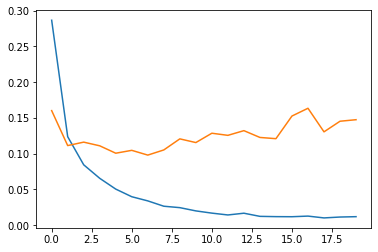

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

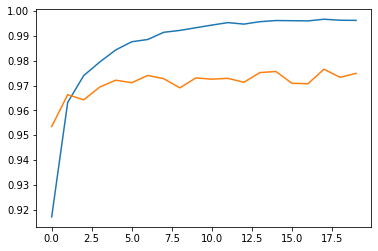

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])